### Introduction: Project Goal
    
The goal of this project is to visualize Spotify top 5000 albums data. 

### Background

### Data and Methodology
This dataset contains features data for Spotify's top 5000 albums of all time: https://www.kaggle.com/datasets/lucascantu/top-5000-albums-of-all-time-spotify-features

In [1]:
import pandas as pd
import numpy as np

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/yzhou/top5000.csv")
df.head()

,Unnamed: 0,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
0,0,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531,OK Computer,0.135763,0.288083,0.565917,0.161053,0.159375,-9.102417,0.056308,115.450750,0.291733,268435.500000,4.000000
1,1,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983,Wish You Were Here,0.602800,0.373600,0.409800,0.363040,0.384940,-12.689400,0.039740,130.018800,0.259040,530512.000000,3.600000
2,2,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870,In the Court of the Crimson King,0.297686,0.340625,0.370475,0.327265,0.149138,-14.873125,0.043463,118.920625,0.279400,507644.125000,3.875000
3,3,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734,Kid A,0.123219,0.601294,0.676706,0.000669,0.311412,-7.811941,0.268318,116.045059,0.398206,325379.529412,4.058824
4,4,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379,To Pimp a Butterfly,0.322889,0.590750,0.707625,0.000011,0.318419,-5.802062,0.294175,103.444563,0.487187,296225.750000,3.812500


In [3]:
print(df.shape)
df.info()

(4402, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402 entries, 0 to 4401
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4402 non-null   int64  
 1   ars_name          4402 non-null   object 
 2   rel_date          4402 non-null   object 
 3   gens              4402 non-null   object 
 4   descs             4304 non-null   object 
 5   avg_rat           4402 non-null   float64
 6   num_rat           4402 non-null   object 
 7   num_revs          4402 non-null   int64  
 8   album             4402 non-null   object 
 9   acousticness      4402 non-null   float64
 10  danceability      4402 non-null   float64
 11  energy            4402 non-null   float64
 12  instrumentalness  4402 non-null   float64
 13  liveness          4402 non-null   float64
 14  loudness          4402 non-null   float64
 15  speechiness       4402 non-null   float64
 16  tempo             4402 non-null

Convert num_rat to data type int64

In [4]:
df['num_rat'] = df['num_rat'].str.replace(',', '').astype(int)

#### Visualize the Release Date vs. Energy

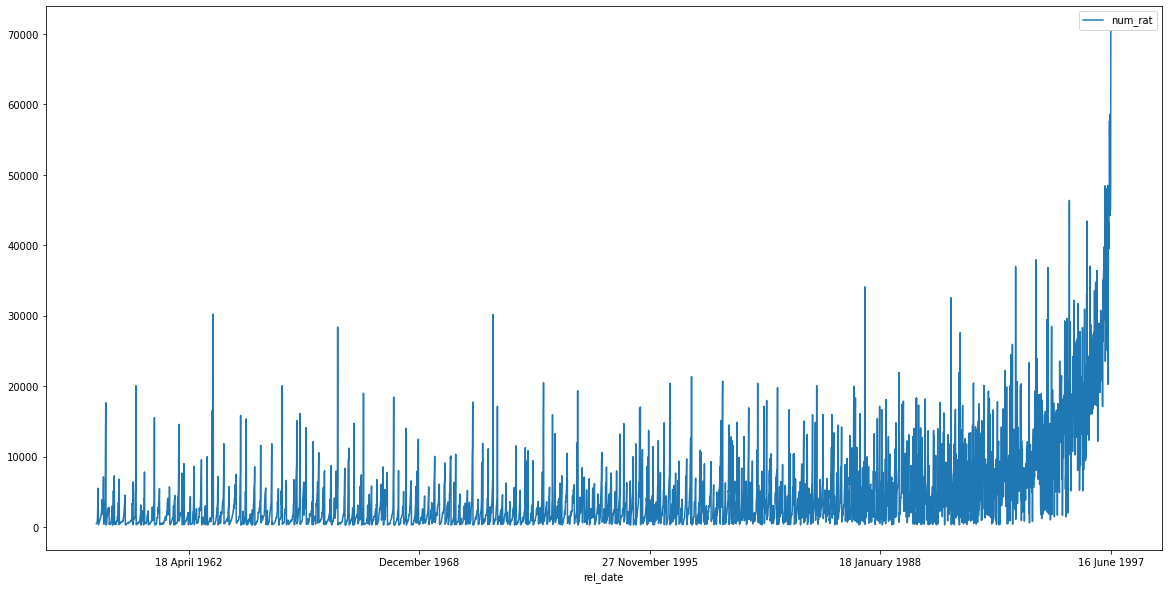

In [5]:
plot_count = df.plot.line(x='rel_date', y='num_rat', figsize=(20, 10)).invert_xaxis()

#### Average ratings of songs has increased from 1962 to 1997

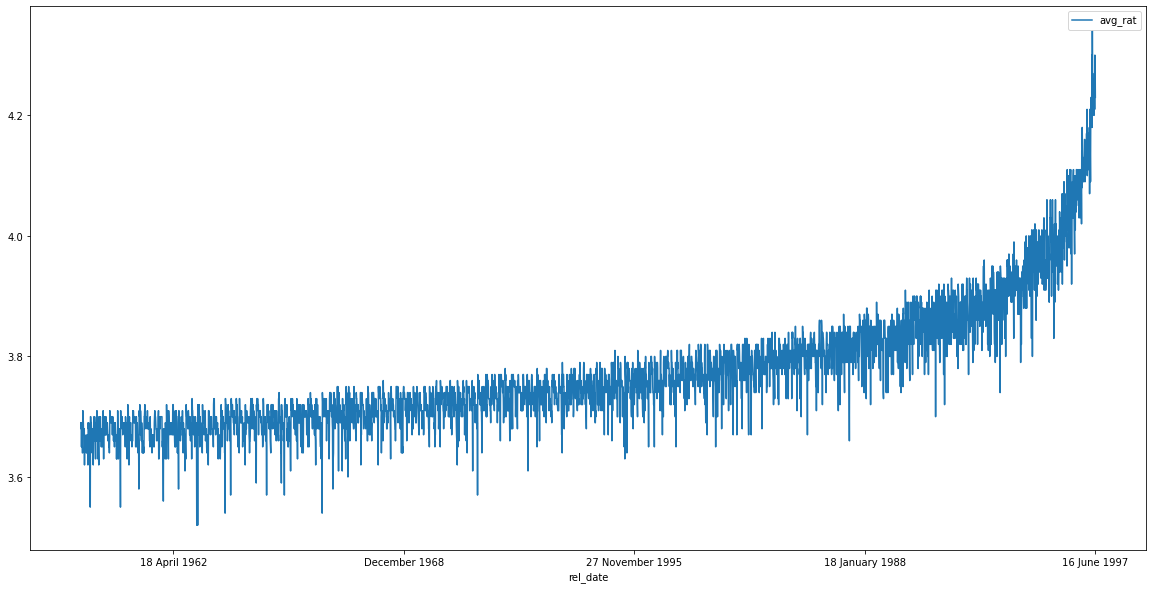

In [6]:
plot_count = df.plot.line(x='rel_date', y='avg_rat', figsize=(20, 10)).invert_xaxis()

#### Valence correlation with danceability:

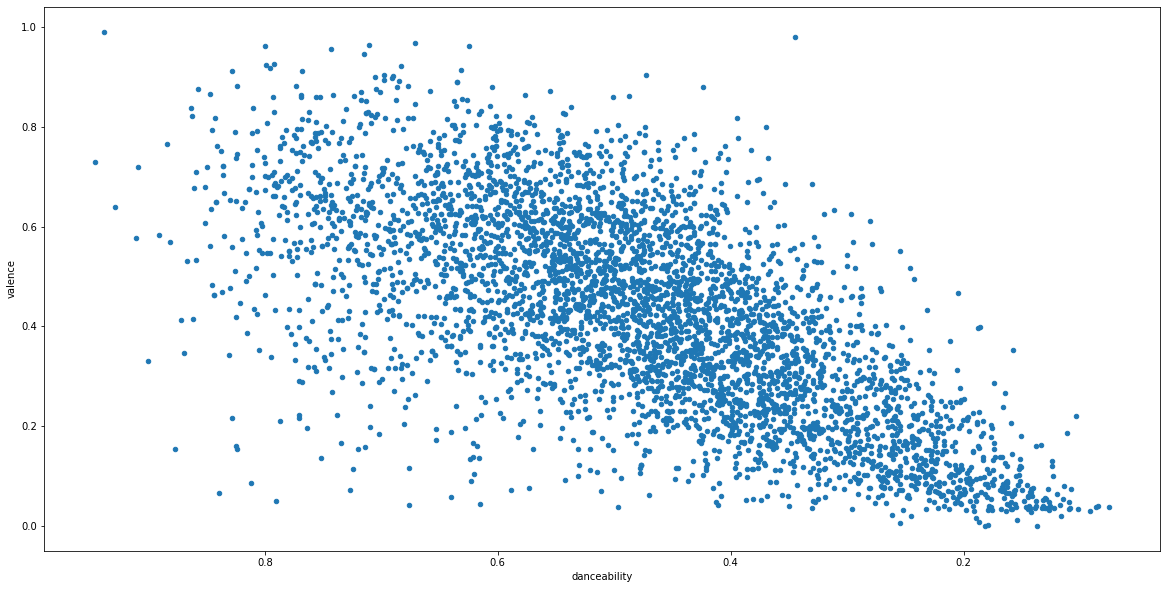

In [13]:
plot_count = df.plot.scatter(x='danceability', y='valence', figsize=(20, 10)).invert_xaxis()

In [23]:
spotify_energy = df.groupby('rel_date').mean().reset_index()
spotify_energy.head()

array(['1 April 1966', '1 April 1974', '1 April 1976', ...,
       'September 2000', 'September 2002', 'September 2009'], dtype=object)

Next steps: plot energy vs. release date. Group release date by year

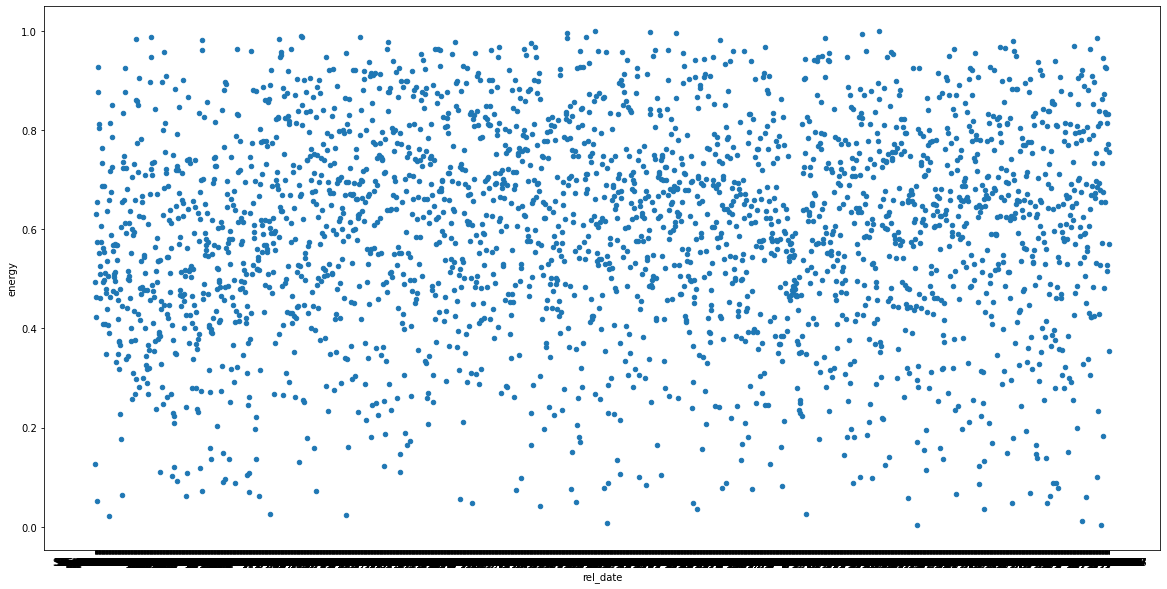

In [24]:
plot_energy = spotify_energy.plot.scatter(x='rel_date', y='energy', figsize=(20, 10)).invert_xaxis()